In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

In [2]:
import numpy as np

In [3]:

import matplotlib.pyplot as plt
import matplotlib as mpl

# inspired by http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
#     'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 8, # fontsize for x and y labels (was 10)
    'axes.titlesize': 8,
    'font.size': 8, # was 10
    'legend.fontsize': 6, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
}
mpl.rcParams.update(params)

## For colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable
#         ## Add colorbar
#         divider = make_axes_locatable(axs[ax_idx])
#         cax1 = divider.append_axes("right", size="5%", pad=0.05)
#         fig.colorbar(img1, cax=cax1)


In [4]:
from misloc_mispol_package.calc import BEM_simulation_wrapper as bem
from misloc_mispol_package.calc import fitting_misLocalization as fit

from misloc_mispol_package.optics import diffraction_int as diffi

import scipy.optimize as opt
m_per_nm = fit.m_per_nm

In [5]:
import scipy.io as sio

In [6]:
mat_images = sio.loadmat(
    "/Users/chair/Documents/Academia/SuperRes/Biteen_colab/"+
    "from_Biteen_group/rerecoverthelocalization/mov_006_molecule_img_good.mat"
    )

In [7]:
exp_obs_pts = diffi.observation_points(0, 48*20*m_per_nm, 0, 48*20*m_per_nm, 21) ## cm_per_m

In [8]:
def dipole_fields(p, ang, x, y):
    
    p_x = p*np.cos(ang)
    p_y = p*np.sin(ang)

    
    field = real_dipole_fields(np.array([[p_x, p_y, 0]]), np.array([[x, y,0]]))
    
    return field
    

In [9]:
def model_dip_image(p, ang, x, y, offset):
    
    ## Shift coordines to match data
    x = (x)*m_per_nm
    y = (y)*m_per_nm
    
    ## Initialize observation pts
    inst = fit.CoupledDipoles(
        obs_points=exp_obs_pts, 
        drive_energy_eV=2.32
                             )
    
    real_dipole_fields = inst.mb_p_fields
    
    p_x = p*np.cos(ang)
    p_y = p*np.sin(ang)
    
    field = real_dipole_fields(np.array([[p_x, p_y, 0]]), np.array([[x, y, 0]]))
    
    image = inst.image_from_E(field)
    
    return image.ravel() + offset#, field


def normed_model_dip_image(p, ang, x, y, offset):
    
    image = model_dip_image(p, ang, x, y, offset)
    
    normed_image = image / np.max(image)
    
    return normed_image
    

In [10]:
import scipy.special as spf

spf.spherical_jn( 1, 0 )

0.0

In [11]:
model_dip_image( 1E-12, 1, 480.00000000000006, 528.0, 1)

  File "/Users/chair/anaconda/envs/py36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/chair/anaconda/envs/py36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/chair/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/chair/anaconda/envs/py36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/chair/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Users/chair/anaconda/envs/py36/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Users/chair/anaconda/envs/py36/lib/python3.6/asyncio/base_events.py", line 427, in run_forever
    self._run_once()
  File "/Users/chair/anaconda/envs/py36/lib/python3.6/as

array([6.02831459e+00, 1.32246767e+01, 1.88405857e+01, 1.78377658e+01,
       1.46333689e+01, 2.02801518e+01, 4.18423843e+01, 7.61436666e+01,
       1.13636155e+02, 1.46624775e+02, 1.73576180e+02, 1.97298177e+02,
       2.19889716e+02, 2.37697786e+02, 2.39030080e+02, 2.08684899e+02,
       1.41806059e+02, 5.93262480e+01, 5.44842260e+00, 1.54485561e+01,
       7.62460786e+01, 8.58633906e+00, 1.60674241e+01, 1.78274425e+01,
       1.48208439e+01, 1.83367257e+01, 3.75098206e+01, 6.78194122e+01,
       9.47700618e+01, 1.07465716e+02, 1.06537346e+02, 1.00931351e+02,
       1.01150111e+02, 1.16219435e+02, 1.52307022e+02, 2.06567830e+02,
       2.57617578e+02, 2.67476026e+02, 2.08747688e+02, 1.01672835e+02,
       1.54783055e+01, 1.08098397e+01, 1.32815478e+01, 1.80837898e+01,
       1.47853219e+01, 1.20943303e+01, 2.33720075e+01, 4.80911567e+01,
       6.92748597e+01, 7.18878922e+01, 5.84360050e+01, 4.30028596e+01,
       3.39643465e+01, 2.72871021e+01, 1.69297544e+01, 1.07739558e+01,
      

In [12]:
exp_obs_pts[0][221]

array([4.80e-05, 5.28e-05])

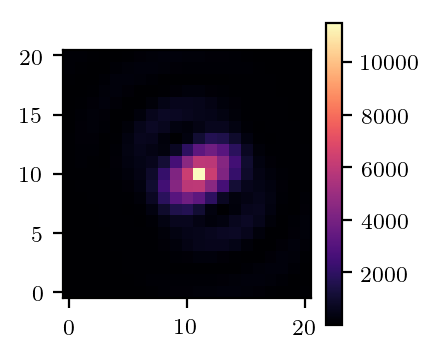

In [13]:
plt.figure(figsize=(2,2), dpi=200)
plt.imshow(model_dip_image( 1E-12, 1, 480.00000000000006, 528.0, 1).reshape(21,21))
plt.colorbar()


In [47]:
class ReallyRealFittingTools(fit.FittingTools):
    """ Slightly modified FittingTools class for convenience in fitting real data
        I was motivated to write this beacuse I can the covarience for plotting fits"""
    def __init__(self, obs_pts):
        fit.FittingTools.__init__(self, obs_pts)
        
    def fit_model(self, images):
        """ calculate index of maximum in each image. """
        num_of_images = images.shape[0]

        apparent_centroids_xy = np.zeros((num_of_images,2))

        max_positions = self.calculate_max_xy(images)

        for i in np.arange(num_of_images):
            x0 = max_positions[0][i]
            y0 = max_positions[1][i]
            params0 = (1E10, 2, x0+200, y0+200,  0)
            print(f"params0: {params0}")
            fit_results = opt.least_squares(
                lambda fit_params: (
                    normed_model_dip_image(*fit_params)
                    -
                    (images[i]/np.max(images[i]))
                    ), 
                params0,
                x_scale=[1E10, 1, 1E2, 1E2, 1],
#                 xtol=0
                )
            resulting_fit_params = fit_results['x']
            fit_gaussian = normed_model_dip_image(
                *resulting_fit_params
                )

        return fit_results, fit_gaussian   ## returns [x_cen(s), y_cen(s)]


In [48]:
exp_fit_inst = ReallyRealFittingTools(exp_obs_pts)
best_fit_params, best_fit = exp_fit_inst.fit_model(
    np.asarray([mat_images['bgsub_img'][...,26].ravel()]))

params0: (10000000000.0, 2, 680.0, 728.0, 0)


In [49]:
best_fit_params.x

array([7.32730722e+32, 4.83617564e+00, 4.76450109e+02, 5.08779547e+02,
       0.00000000e+00])

#### within a few nm of the Gaussian fit results
4.82265769e+02,  5.00226690e+02,

In [50]:
best_fit_params.message

'`ftol` termination condition is satisfied.'

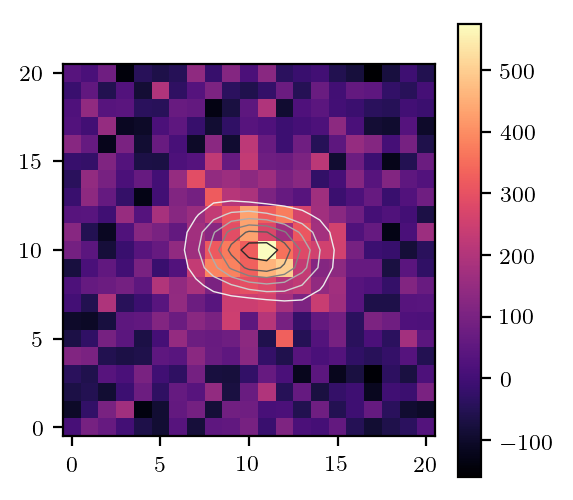

In [51]:
image = mat_images['bgsub_img'][...,26].ravel()

plt.figure(
    figsize=(3,3), 
    dpi=200
) 
ax = plt.axes()

img = ax.imshow(image.reshape(21,21))

ax.contour(
    range(0,21),
    range(0,21),
    best_fit.reshape(exp_obs_pts[-2].shape),
    cmap='Greys',
    linewidths=0.5,
    )
plt.colorbar(img)

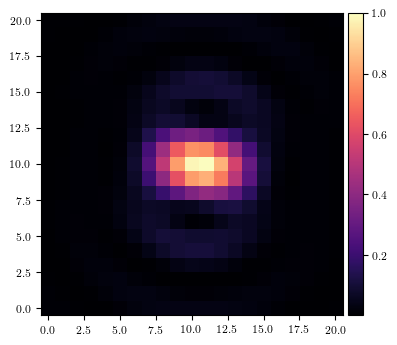

In [28]:
fig = plt.figure(dpi=100)
ax = plt.axes()
img1 =ax.imshow(
#     range(0,21),
#     range(0,21),
    best_fit.reshape(exp_obs_pts[-2].shape),
#     cmap='Greys',
#     linewidths=0.5,
    )
## Add colorbar
divider = make_axes_locatable(plt.gca())
cax1 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(img1, cax=cax1)

OK, lets try fitting a plasmon coupled image.